In [1]:
import pandas as pd
import datetime as dt

In [2]:
data= pd.read_csv("df_train.csv")
len(data["symbol"].unique()) #number of companies

100

In [3]:
data["returns"]= data["close"]/data["close"].shift(1)-1
data

,date,symbol,open,close,low,high,volume,returns
0,2010-01-04,ACTS,15.133174,14.966052,14.841624,15.279988,5459.882185,NaN
1,2010-01-04,AMWD,7.001891,7.122279,6.982513,7.141690,92067.274571,-0.524104
2,2010-01-04,ARV,18.269635,18.312473,18.124029,18.471135,38034.256648,1.571154
3,2010-01-04,BBY,3.111403,3.114155,3.094573,3.133303,40964.820233,-0.829944
4,2010-01-04,BCDM,19.778026,19.525538,19.410578,19.904377,3646.991322,5.269932
...,...,...,...,...,...,...,...,...
100595,2013-12-31,XTG,29.171318,28.618726,28.991411,28.978133,42044.703355,-0.845622
100596,2013-12-31,YPN,13.881707,13.853957,13.799098,13.957827,29030.106032,-0.515913
100597,2013-12-31,YRD,11.683037,11.568439,11.655770,11.657566,11778.336029,-0.164972
100598,2013-12-31,YVNL,2.427592,2.402329,2.421336,2.413764,6431.843012,-0.792338


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100600 entries, 0 to 100599
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     100600 non-null  object 
 1   symbol   100600 non-null  object 
 2   open     100600 non-null  float64
 3   close    100600 non-null  float64
 4   low      100600 non-null  float64
 5   high     100600 non-null  float64
 6   volume   100600 non-null  float64
 7   returns  100599 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.1+ MB


In [5]:
data["date"]= pd.to_datetime(data["date"])

In [6]:
print(data["date"].min(), "to ", data["date"].max())


2010-01-04 00:00:00 to  2013-12-31 00:00:00


In [7]:
test_data= data[data["date"]>"2013-01-01"]
data= data[data["date"]<="2013-01-01"]
data=data[["date","symbol", "close"]]
df_wide = data.pivot(index="date", columns="symbol", values="close")
df_wide = df_wide.dropna(axis=1)  # drop symbols with missing values
df_wide

symbol,ACTS,AMWD,ARV,BBY,BCDM,BZK,BZQM,CDM,CDRX,CLYQ,...,WYLR,WZB,XBRQ,XFG,XPT,XTG,YPN,YRD,YVNL,ZQN
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,14.966052,7.122279,18.312473,3.114155,19.525538,15.136430,52.769951,13.084324,13.335318,2.849337,...,13.450050,6.144264,9.675842,20.004224,61.426967,19.584540,13.995177,5.233231,3.023527,29.426391
2010-01-05,14.852205,6.985680,18.256234,3.087493,19.295552,15.100912,51.600603,12.974828,13.151036,2.806146,...,13.328863,6.054681,9.652168,20.016922,60.846685,19.331908,13.820074,5.221392,2.996185,29.357716
2010-01-06,14.856499,6.836390,17.880421,3.036589,18.999495,14.907689,50.723194,13.053232,12.953977,2.797236,...,13.171893,5.950274,9.509221,19.383817,59.631225,19.414495,13.705607,5.140879,2.906755,28.696769
2010-01-07,14.700646,6.665472,18.172287,2.999333,18.782847,14.863295,50.547168,13.035640,12.613470,2.758480,...,13.311339,5.961557,9.403774,18.936818,62.056471,19.466016,13.758579,5.112838,2.880474,28.538258
2010-01-08,14.400342,6.596581,17.737063,2.933120,18.685263,14.863521,49.821958,12.902078,12.268549,2.785457,...,13.132483,5.893442,9.228547,18.380826,60.799506,19.350195,13.572821,5.080571,2.764464,27.719083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-24,10.141202,8.879046,19.584842,3.362841,14.119237,13.651626,50.111876,15.504145,11.124446,2.135251,...,24.960286,5.696349,3.489313,11.923482,117.495837,26.358492,11.656298,8.553872,1.729166,20.085248
2012-12-26,10.241020,8.802380,19.850741,3.350603,14.256770,13.795811,48.860073,15.734379,11.231686,2.131587,...,24.990487,5.718229,3.522170,11.778040,118.640588,26.860455,11.492240,8.629503,1.730338,20.162090
2012-12-27,10.116795,8.665834,19.612246,3.331722,14.273750,13.692777,48.425397,15.580963,11.071559,2.131407,...,25.072970,5.735981,3.491809,11.848994,119.811386,26.434130,11.494506,8.590964,1.716876,20.186735


In [8]:
from statsmodels.tsa.stattools import coint
import itertools

symbols = df_wide.columns
best_pair = None
best_pval = 1.0

# Test all combinations of pairs
for sym1, sym2 in itertools.combinations(symbols, 2):
    series1 = df_wide[sym1]
    series2 = df_wide[sym2]
    _, pval, _ = coint(series1, series2)
    if pval < best_pval:
        best_pval = pval
        best_pair = (sym1, sym2)

print(f"Most cointegrated pair: {best_pair} (p-value = {best_pval:.4f})")

Most cointegrated pair: ('TLXN', 'VXT') (p-value = 0.0000)


Final NAV: 107767.73746604277
Annualized Return: 0.08474387744440956
Annualized Volatility: 0.13859607234162288
Annualized Sharpe Ratio: 0.6114450143689928


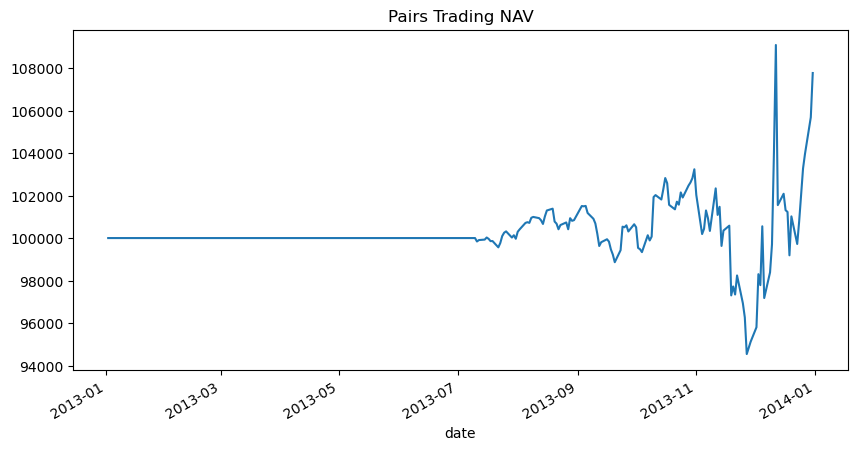

In [11]:
from PairsTradingStrategy import PairsTrading
from portfolio import Portfolio
from events import SignalEvent, OrderEvent
import matplotlib.pyplot as plt

# Initialize your strategy and portfolio
strategy  = PairsTrading(symbol_x=best_pair[0], symbol_y=best_pair[1], lookback=60)
portfolio = Portfolio(start_cash=100_000)
last_prices = {}

# Main backtest loop
for date, group in test_data.groupby("date"):
    for _, row in group.iterrows():
        sym   = row["symbol"]
        price = row["close"]
        last_prices[sym] = price

        signals = strategy.calculate_signal(sym, price, date) 
        for sig in signals:
            order = portfolio.generate_order(sig, last_prices[sig.symbol])

    # After all symbols for the day, record NAV
    portfolio.update_timeindex(date, last_prices)

# Performance
nav = pd.DataFrame(portfolio.holdings, columns=["date", "NAV"]).set_index("date")
nav["returns"] = nav["NAV"].pct_change()

# Drop first NaN from returns
daily_returns = nav["returns"].dropna()

# Sharpe Ratio Calculation
mean_ret = daily_returns.mean()
vol_ret  = daily_returns.std()
sharpe_ratio = (mean_ret / vol_ret) * (252**0.5)

print("Final NAV:", nav["NAV"].iloc[-1])
print("Annualized Return:", mean_ret * 252)
print("Annualized Volatility:", vol_ret * (252**0.5))
print("Annualized Sharpe Ratio:", sharpe_ratio)


nav["NAV"].plot(title="Pairs Trading NAV", figsize=(10,5))
plt.show()
